In [8]:
# coding: UTF-8
#add networkx

import networkx as nx


import random

# from coupling import coupling
from matplotlib.pyplot import ylim, title, xlim
%matplotlib inline

from clusteredNet import *
from coupling import coupling
from gameModel import gameStep, countC_of_gameLayer, makePointList
from opinionModel import *
from makeGraph import makeGraph_fromFile, makeGraph_fromFile, printGstate
from matplotlib import pyplot as plt
from publicGoodsGame import publicGoods_game

In [9]:
activistRate = 0.0
nodeNum = 500
kaisu = 700
couplingStrength = 0.2
opinionLayerStrength = 0.5#--------------層の生成

network_dir = "./networks/"

OLnetwork = network_dir + 'RegularNetwork.csv'
GLnetwork = network_dir + 'BAnetwork2.csv'

BA = network_dir + 'BAnetwork.csv'


#GLの層
gameLayer_info = makeGraph_fromFile(nodeNum,GLnetwork, 'GL',activistRate)
gameLayer = gameLayer_info[0]
strategyList = gameLayer_info[2]


#OLの層
opinionLayer_info = makeGraph_fromFile(nodeNum,BA, 'ON',activistRate)
opinionLayer = opinionLayer_info[0]
opinionList = opinionLayer_info[1]

#OLがclusterの場合

# opinionLayer_info = makeClusteredInfor('clusteredNet.gpickle')
# opinionLayer = opinionLayer_info[0]
# opinionList = opinionLayer_info[1]

In [10]:
#---------------------------

# #各層の最初のCの数を数えてリストにいれる
numOfCList_gameLayer =[]
numOfCList_opinionLayer=[]

numOfCList_opinionLayer.append(countC_of_opinionLayer(opinionLayer))
numOfCList_gameLayer.append(countC_of_gameLayer(gameLayer))

In [15]:
#-------------------------


for num in range(kaisu):
    rand = random.random()
    if rand < couplingStrength:
        coupling_info =coupling(gameLayer, opinionLayer, opinionList,opinionLayerStrength)
        gameLayer = coupling_info[0]
        opinionLayer = coupling_info[1]
        opinionList = coupling_info[2]

    else:

        #こちらはGameLayer
        #PGGの場合
        # gameLayer = publicGoods_game(gameLayer,1.1,1)
        #囚人のジレンマの場合
        gameLayer = gameStep(gameLayer, 0.5, 0.5)

        #こちらはOpinionLayer
        #voter game
        opinionLayerset = opinionExchange(opinionLayer,opinionList)
        opinionLayer = opinionLayerset[0]
        opinionList = opinionLayerset[1]

        #majority vote
        # opinionLayerset = majorityGame(opinionLayer,opinionList)
        # opinionLayer = opinionLayerset[0]
        # opinionList = opinionLayerset[1]

    numOfCList_gameLayer.append(countC_of_gameLayer(gameLayer))
    numOfCList_opinionLayer.append(countC_of_opinionLayer(opinionLayer))


# print 'game', numOfCList_gameLayer
# print 'opinion',numOfCList_opinionLayer


# printClusteredG(opinionLayer)

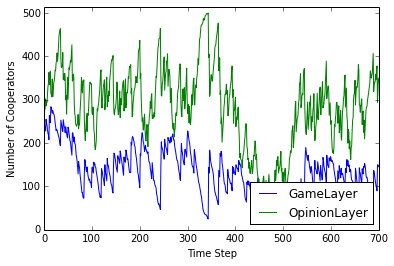

In [16]:
plt.plot(numOfCList_gameLayer,label="GameLayer")
plt.plot(numOfCList_opinionLayer,label="OpinionLayer")
plt.xlabel("Time Step")
plt.ylabel("Number of Cooperators")

ylim(0,nodeNum*1.03)
xlim(0,kaisu)
plt.legend(loc="lower right")
plt.show()